In [41]:
# Importing Libraries
# import yasa
import mne
import os
import scipy
import plotnine
import numpy as np
import pandas as pd
from folium.plugins import MarkerCluster
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import entropy as ent
import seaborn as sns
from matplotlib import mlab as mlab
import matplotlib.gridspec as gs

In [9]:
# Load data
depth = pd.read_csv('..\\Data\\00_PenguinArterialSaturation_Depth_1Hz.csv')
sats = pd.read_csv('..\\Data\\00_PenguinArterialSaturation_SatPO2_5s.csv')

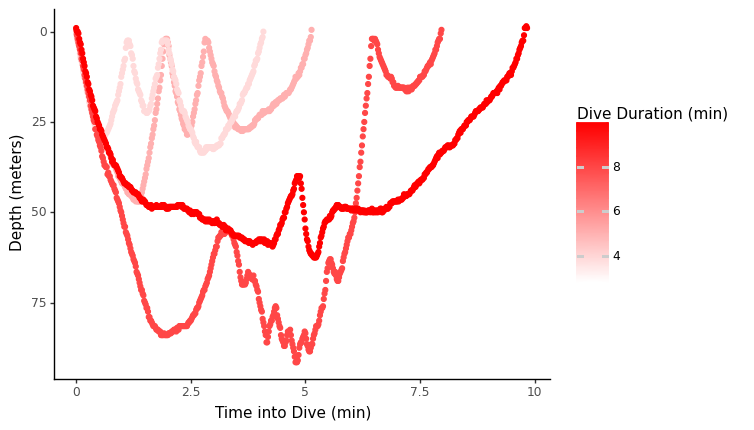

<ggplot: (107067650877)>

In [65]:
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

fig = (
    ggplot(depth)
    + aes(x='Dive_Time_min', y='Depth', color='DiveDur_m')
    + geom_point()
    + theme_classic()
    + scale_y_reverse()
    + scale_color_gradient(low='white', high='red', name = 'Dive Duration (min)')
    + labs(x='Time into Dive (min)', y='Depth (meters)')
)

fig


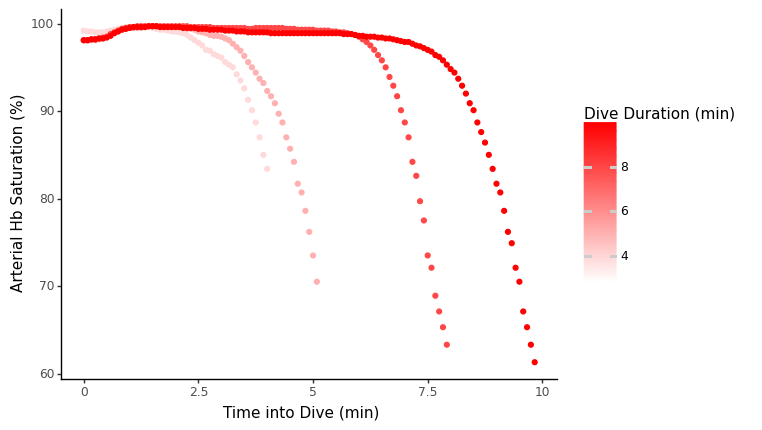

<ggplot: (107072530914)>

In [66]:
fig2 = (
    ggplot(sats)
    + aes(x='Dive_Time_min', y='SAT', color='DiveDur_m')
    + geom_point()
    + theme_classic()
    + scale_color_gradient(low='white', high='red', name = 'Dive Duration (min)')
    + labs(x='Time into Dive (min)', y='Arterial Hb Saturation (%)')
)

fig2

In [40]:
# Create a trace for each dimension (x, y, z)
import plotly.graph_objs as go
import plotly.subplots as sp
import plotly.express as px

# Create figure with two subplots
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add depth traces to first subplot
for ind_id in depth['DiveDepth_m'].unique():
    data = depth[depth['DiveDepth_m'] == ind_id]
    fig.add_trace(px.line(x=data['Dive_Time_min'], y=data['Depth'], color='DiveDepth_m'),
                  row=1, col=1)

# Add saturation traces to second subplot
for ind_id in sats['DiveDepth_m'].unique():
    data = sats[sats['PenguinID'] == ind_id]
    fig.add_trace(go.Scatter(x=data['Dive_Time_min'], y=data['SAT'], name=f'Penguin {ind_id}'),
                  row=2, col=1)

# Update layout
fig.update_layout(height=800, width=800,
                  title='Depth and Saturation for Multiple Individuals',
                  yaxis=dict(title='Depth (m)', autorange='reversed'),
                  yaxis2=dict(title='Saturation (%)'))

# Show figure
fig.show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'color' is of type str or int.